<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Xây dựng và đánh giá mô hình dựa trên tập dữ liệu về Room Occupancy Estimation </strong></h2>

### <b>Nhóm 19 </b>
### <b>Họ và tên sinh viên: Đặng Thị Hiệp (B2016964)</b>

### <b>Học phần: CT294 - Máy học ứng dụng</b>
### <b>Giáo viên bộ môn: Lưu Tiến Đạo</b>

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📜 Nội dung</strong></h1>

### 1. [Khai báo thư viện](#1)
<br>

### 2. [Đọc dữ liệu](#2)
<br>

### 3. [Mô tả dữ liệu](#3)

<br>

### 4. [Tiền xử lý dữ liệu](#4)

<br>

### 5. [Xây dựng và đánh giá mô hình](#3)

<br>

<hr>

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 1. Khai Báo Thư Viện</strong></h1>

In [198]:
#Khai báo thư viện
import pandas as pd #đọc dữ liệu
import numpy as np #xử lý dữ liệu
import matplotlib.pyplot as plt #vẽ biểu đồ
import seaborn as sns

#chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler

#Các phương pháp xây dựng mô hình
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split #chia tập dữ liệu
from sklearn.tree import DecisionTreeClassifier #Giải thuật Cây quyết định phân loại
from sklearn.neighbors import KNeighborsClassifier #Giải thuật Knn
from sklearn.naive_bayes import GaussianNB #Giải thuật Bayes Ngây Thơ
from sklearn.model_selection import KFold #Giải thuật K-Fold

#Kiểm tra độ chính xác của mô hình
from sklearn.metrics import accuracy_score #đo mức độ chính xác
from sklearn.metrics import confusion_matrix #kiểm tra độ chính xác bằng ma trận con
from sklearn.metrics import plot_confusion_matrix # vẽ biểu đồ ma trận con
from sklearn.model_selection import cross_val_score # tính độ chính xác trung bình
from sklearn.metrics import classification_report


<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 2. Đọc dữ liệu</strong></h1>

In [199]:
#Cho phép truy cập google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [200]:
#Đọc dữ liệu từ file csv
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Occupancy_Estimation.csv", delimiter=',', skipinitialspace = True)
df.columns = df.columns.str.replace(' ', '') #strip những khoảng trắng dư thừa

print("Tập dữ liệu gốc bao gồm (hàng, cột):", str(df.shape))

df.head()

Tập dữ liệu gốc bao gồm (hàng, cột): (10129, 19)


,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


<a id="3"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 3. Mô Tả Dữ Liệu</strong></h1>
****
Sử dụng hàm .shape và .info () trong python để có cái nhìn tổng thể về cả tập dữ liệu huấn luyện (training set) và thử nghiệm (test set).

In [201]:
#Kích thước dữ liệu
print ("Kích thước dữ liệu gồm (hàng, cột):"+ str(df.shape))
#Xác định kiểu dữ liệu
print (df.info())

Kích thước dữ liệu gồm (hàng, cột):(10129, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                1

In [202]:
#giá trị nhãn
df['Room_Occupancy_Count'].unique()

array([1, 2, 3, 0])

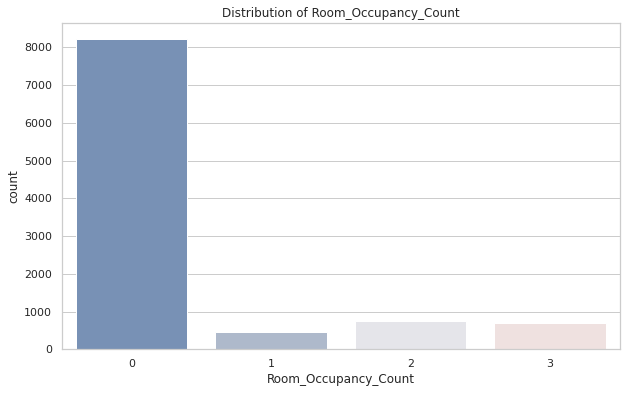

In [203]:
# kiểm tra phân phối nhãn - Room_Occupancy_Count
sns.set_theme(style='whitegrid',palette='vlag',rc={'figure.figsize':(10,6)})
ax = sns.countplot(x=df.Room_Occupancy_Count)
ax.set(title='Distribution of Room_Occupancy_Count');

<a id="4"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 4. Tiền Xử Lý Dữ Liệu</strong></h1>

In [204]:
# Xóa bỏ các cột không có ích trong việc dư đoán
df.columns

Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count'],
      dtype='object')

In [205]:
cols_to_use = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2','S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count']

df = df[cols_to_use]

In [206]:
df.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0,0,1
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0,0,1
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0,0,1
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0,0,1
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0,0,1


In [207]:
df.shape

(10129, 16)

In [208]:
#Chia dữ liệu thành các đặc trưng 'X' và nhãn 'y'
X = df.drop(['Room_Occupancy_Count'], axis = 1)
#Target variable in y
y = df["Room_Occupancy_Count"]

In [209]:
#Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1.0/3.0, random_state=0)

In [210]:
print("Length of X_train: " + str(len(X_train)))
print("Length of X_test: " + str(len(X_test)))

Length of X_train: 6752
Length of X_test: 3377


In [211]:
#Quy đổi dữ liệu scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

<a id="5"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 5. Xây dựng và đánh giá mô hình </strong></h1>

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy Logistic Regression =  98.96 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2743
           1       0.99      0.99      0.99       147
           2       0.97      0.91      0.94       268
           3       0.89      0.97      0.93       219

    accuracy                           0.99      3377
   macro avg       0.96      0.97      0.96      3377
weighted avg       0.99      0.99      0.99      3377



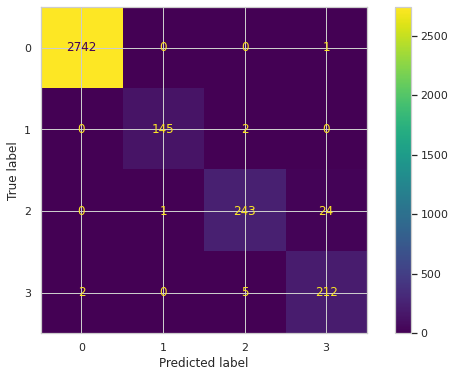

In [212]:
#Hồi quy logistic
import sklearn.linear_model as lm
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_test_preds = lr.predict(X_test)
acc_lr = round(accuracy_score(y_test,y_test_preds)*100,2)
print("Accuracy Logistic Regression = ", acc_lr,'%')

plot_confusion_matrix(lr, X_test, y_test)
print(classification_report(y_test, y_test_preds))

In [213]:
print("Cross val: ", cross_val_score(lr, X_train, y_train, cv=10, scoring="accuracy"))
np.mean(cross_val_score(lr, X_train, y_train, cv=10, scoring="accuracy"))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Cross val:  [0.99260355 0.9852071  0.99259259 0.99555556 0.99703704 0.99259259
 0.99259259 0.99407407 0.98962963 0.99407407]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

0.9925958799035722

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Accuracy: 99.3485342019544 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2743
           1       0.96      0.97      0.97       147
           2       0.97      0.96      0.96       268
           3       0.97      0.98      0.97       219

    accuracy                           0.99      3377
   macro avg       0.97      0.98      0.98      3377
weighted avg       0.99      0.99      0.99      3377



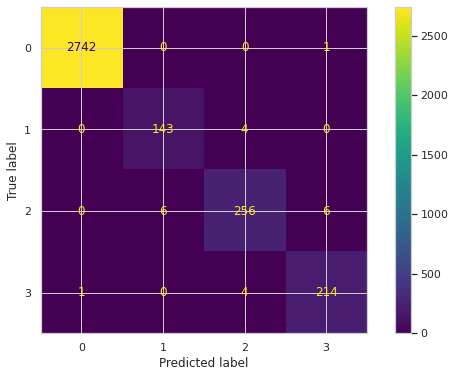

In [214]:
#Cây quyết định 

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
acc_dt = round(clf.score(X_test,y_test) * 100, 2)
print ("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred)*100,"%")
plot_confusion_matrix(clf, X_test, y_test)
print(classification_report(y_test, y_pred))


In [215]:
print("Cross val: ", cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy"))
np.mean(cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy"))

Cross val:  [0.99112426 0.98964497 0.98962963 0.99407407 0.99259259 0.99555556
 0.99111111 0.99555556 0.99407407 0.99407407]


0.99229892614508

kNN Accuracy: 98.84512881255553 %


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2743
           1       0.97      0.95      0.96       147
           2       0.95      0.94      0.95       268
           3       0.91      0.97      0.94       219

    accuracy                           0.99      3377
   macro avg       0.96      0.97      0.96      3377
weighted avg       0.99      0.99      0.99      3377



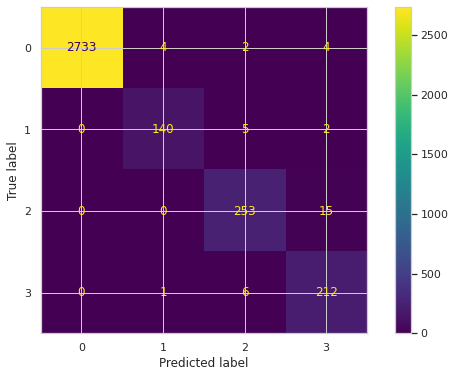

In [216]:
# K láng giềng
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test,y_test) * 100, 2)

print("kNN Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
plot_confusion_matrix(knn, X_test, y_test)
print(classification_report(y_test, y_pred))

In [ ]:
print("Cross val: ", cross_val_score(knn, X_train, y_train, cv=10, scoring="accuracy"))
np.mean(cross_val_score(knn, X_train, y_train, cv=10, scoring="accuracy"))

Cross val:  [0.98964497 0.98076923 0.99407407 0.99555556 0.99407407 0.99111111
 0.99407407 0.99407407 0.98814815 0.98962963]


In [ ]:
#Bayes thơ ngây
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
acc_gnb = round(gnb.score(X_test,y_test) * 100, 2)

print("Naive Bayes Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
plot_confusion_matrix(gnb, X_test, y_test)
print(classification_report(y_test, y_pred))


In [ ]:
print("Cross val: ", cross_val_score(gnb, X_test, y_test, cv=10, scoring="accuracy"))
np.mean(cross_val_score(gnb, X_test, y_test, cv=10, scoring="accuracy"))

In [ ]:
print('Decision Tree:', acc_dt,'%')
print('kNN:', acc_knn,'%')
print('GaussianNB:',acc_gnb,'%')
print('Logistic Regresstion:', acc_lr,'%')

In [ ]:
#K-Fold
kf = KFold(n_splits=10, random_state=None, shuffle=False)

for train_index, test_index in kf.split(X):
  print("Train:", train_index, "Test:", test_index) # in giá trị chỉ số của tập huấn luyện và tập kiểm tra
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  print("X_test", X_test)
  print("========================")

In [ ]:
# du doan
dudoan_lr = lr.predict([[25.00,	24.75,	24.56,	25.44,	121,	34,	53,	40,	0.41,	0.10,	0.10,	0.09,	39.0,	0,	0]])
dudoan_knn = knn.predict([[25.00,	24.75,	24.56,	25.44,	121,	34,	53,	40,	0.41,	0.10,	0.10,	0.09,	39.0,	0,	0]])
dudoan_clf = clf.predict([[25.00,	24.75,	24.56,	25.44,	121,	34,	53,	40,	0.41,	0.10,	0.10,	0.09,	39.0,	0,	0]])
dudoan_gnb = gnb.predict([[25.00,	24.75,	24.56,	25.44,	121,	34,	53,	40,	0.41,	0.10,	0.10,	0.09,	39.0,	0,	0]])
print("Giá trị dự đoán LR: ",dudoan_lr)
print("Giá trị dự đoán KNN: ",dudoan_knn)
print("Giá trị dự đoán DT: ",dudoan_clf)
print("Giá trị dự đoán BY: ",dudoan_gnb)